In [2]:
with open('data/Test_second/epigraphic_corpus-2.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

In [4]:
lines[0]

'<doc id="file32708451" filename="Epigrafika" parent_folder="web_wikipedia" url="https://uk.wikipedia.org/wiki/%D0%95%D0%BF%D1%96%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA%D0%B0">\n'

In [14]:
def split_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    total_lines = len(lines)
    
    lines_per_part = total_lines // 40

    remainder = total_lines % 40
    
    output_dir = "data/Test_second"
    
    import os
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    start = 0
    for i in range(40):
        if i < remainder:
            lines_in_part = lines_per_part + 1
        else:
            lines_in_part = lines_per_part
        
        end = start + lines_in_part
        part_lines = lines[start:end]

        part_file_path = os.path.join(output_dir, f"part_{i + 1}.txt")
        with open(part_file_path, 'w', encoding='utf-8') as part_file:
            part_file.writelines(part_lines)

        start = end
    
    print(f"Original file has been seperated to 40 parts, and saved in {output_dir}.")

# 使用示例
split_txt_file('data/Test_second/epigraphic_corpus-2.txt')


Original file has been seperated to 20 parts, and saved in data/Test_second.


In [40]:
import spacy
model_path = 'model/first_model'
nlp = spacy.load(model_path)

In [22]:
from tqdm import tqdm
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load('uk_core_news_lg')

# Assume 'annotations' DataFrame is loaded and combined
# Tokenize keywords in advance
annotation_path = 'data/annotation/annotation.csv'
annotations = pd.read_csv(annotation_path)
annotations['keyword_tokens'] = annotations['keywords'].apply(lambda kw: [token.text for token in nlp(kw)])

# List of file paths
files = [
    "data/Test_second/part_1.txt",
    "data/Test_second/part_2.txt",
    "data/Test_second/part_3.txt",
    "data/Test_second/part_4.txt",
    "data/Test_second/part_5.txt",
    "data/Test_second/part_6.txt",
    "data/Test_second/part_7.txt",
    "data/Test_second/part_8.txt",
    "data/Test_second/part_9.txt",
    "data/Test_second/part_10.txt",
    "data/Test_second/part_11.txt",
    "data/Test_second/part_12.txt",
    "data/Test_second/part_13.txt",
    "data/Test_second/part_14.txt",
    "data/Test_second/part_15.txt",
    "data/Test_second/part_16.txt",
    "data/Test_second/part_17.txt",
    "data/Test_second/part_18.txt",
    "data/Test_second/part_19.txt",
    "data/Test_second/part_20.txt",
    "data/Test_second/part_21.txt",
    "data/Test_second/part_22.txt",
    "data/Test_second/part_23.txt",
    "data/Test_second/part_24.txt",
    "data/Test_second/part_25.txt",
    "data/Test_second/part_26.txt",
    "data/Test_second/part_27.txt",
    "data/Test_second/part_28.txt",
    "data/Test_second/part_29.txt",
    "data/Test_second/part_30.txt",
    "data/Test_second/part_31.txt",
    "data/Test_second/part_32.txt",
    "data/Test_second/part_33.txt",
    "data/Test_second/part_34.txt",
    "data/Test_second/part_35.txt",
    "data/Test_second/part_36.txt",
    "data/Test_second/part_37.txt",
    "data/Test_second/part_38.txt",
    "data/Test_second/part_39.txt",
    "data/Test_second/part_40.txt",
    # Assume other files as needed
]

# Prepare to write to the TSV file
with open("data/Test_second/data/data.tsv", "w", encoding='utf-8') as f:
    # Process each file
    for file_path in tqdm(files, total=len(files)):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        doc = nlp(text.strip())

        # Iterate over the sentences
        for sent in doc.sents:
            sent_tokens = [token.text for token in sent if token.text not in ['\t', '\n', ' ']]
            token_labels = ['O' for _ in sent_tokens]  # Initialize labels as 'O' for each token

            # Check for matching keyword token sequences
            for _, row in annotations.iterrows():
                keyword_tokens = row['keyword_tokens']
                for i in range(len(sent_tokens) - len(keyword_tokens) + 1):
                    if sent_tokens[i:i + len(keyword_tokens)] == keyword_tokens:
                        # Match found, apply BIO tagging
                        if all(label == 'O' for label in token_labels[i:i+len(keyword_tokens)]):  # Ensure not to overwrite existing tags
                            token_labels[i] = f'B-{row["type"]}'
                            for j in range(1, len(keyword_tokens)):
                                token_labels[i + j] = f'I-{row["type"]}'

            # Write tokens and tags to file, with newline after each sentence
            for token, label in zip(sent_tokens, token_labels):
                f.write(f"{token}\t{label}\n")
            f.write("\n")  # Newline after each sentence to separate them


  0%|                                                                                           | 0/40 [00:18<?, ?it/s]


KeyboardInterrupt: 

In [35]:
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        data = file.read().strip().split('\n\n')  # Splitting data by double newlines

    formatted_data = []
    for record in data:
        text, entities = '', []
        lines = record.split('\n')
        start = 0  # Initialize start of the first token
        entity_start = None  # Initialize the start of an entity
        entity_type = None  # Initialize the entity type
        for line in lines:
            parts = line.split('\t')
            if len(parts) >= 2:  # Ensure there's at least a token and a tag
                token, tag = parts[0], parts[1]
                # Update text with token followed by space
                text += token + ' '
                end = start + len(token)  # End index of the current token
                if tag.startswith('B-') or tag.startswith('I-'):  # Check if the tag indicates an entity
                    if tag.startswith('B-'):
                        # If there was a previous entity, append it
                        if entity_start is not None:
                            entities.append((entity_start, prev_end, entity_type))
                        # Start new entity
                        entity_start = start
                        entity_type = tag.split('-')[1]
                    if tag.startswith('I-') and entity_start is not None:
                        # Continue the entity
                        entity_type = tag.split('-')[1]  # Update the type if needed (typically not necessary)
                else:
                    # If ending part of entity, append it
                    if entity_start is not None:
                        entities.append((entity_start, end, entity_type))
                        entity_start = None  # Reset for the next entity

                # Prepare for next token
                start = end + 1
                prev_end = end  # Remember the end of the last token

        # Check for any trailing entity at the end
        if entity_start is not None:
            entities.append((entity_start, prev_end, entity_type))

        # Append the parsed data if there are entities
        if entities:
            formatted_data.append((text.strip(), {'entities': entities}))

    return formatted_data

# Load the data
second_data = load_data('data/Test_second/data/data.tsv')

In [36]:
second_data

[("Історики виділяють декілька основних видів епіграфічних пам'яток , які виконують різну функцію : < /p > < p > Вотивні написи — в них висловлюється подяка певному божеству ( « Коли божество X вчинить дію XY для особи Y , то особа Y подякує божеству , зробивши напис » ) .",
  {'entities': [(259, 266, 'inscription')]}),
 ('< /p > < p > Гоноративні написи — в них прославляються вчинки певної людини , зазвичай є також короткий опис цих вчинків .',
  {'entities': [(104, 112, 'inscription')]}),
 ('Переважно це графіті — написи , нанесені гострим знаряддям , як правило , на керамічному посуді та його уламках .',
  {'entities': [(13, 22, 'inscription')]}),
 ('З VI — V століття до н . е . використовувалися для написів черепки як найдешевший матеріал .',
  {'entities': [(82, 92, 'material')]}),
 ('Часом траплялися графіті на свинцевих пластинах з листами і заклинаннями .',
  {'entities': [(17, 27, 'inscription')]}),
 ('До сьогодні збереглися деякі давньоруські написи дохристиянського часу : гр

In [37]:
second_data[0][1]['entities'][0][2]

'inscription'

In [38]:
for each_data in second_data:
    print(each_data[0])
    break

Історики виділяють декілька основних видів епіграфічних пам'яток , які виконують різну функцію : < /p > < p > Вотивні написи — в них висловлюється подяка певному божеству ( « Коли божество X вчинить дію XY для особи Y , то особа Y подякує божеству , зробивши напис » ) .


In [41]:
num_of_sentence = len(second_data)
token_count = 0
num_entities_all = 0
num_of_each_entity_type = {}
for each_data in second_data:
    entities = each_data[1]['entities']
    sentence = each_data[0]
    doc = nlp(sentence)
    token_count += len(doc)
    num_entities_all += len(entities)
    for entity in entities:
        entity_type = entity[2]
        if entity_type in num_of_each_entity_type:
            num_of_each_entity_type[entity_type] += 1
        else:
            num_of_each_entity_type[entity_type] = 1

In [42]:
num_of_each_entity_type

{'inscription': 14970,
 'material': 483,
 'other': 1354,
 'dating_criteria': 4268,
 'object_type': 698,
 'monument': 355,
 'monument_subtype': 12,
 'epigraphic_shorthand': 33,
 'decoration': 961,
 'preservation_state': 150,
 'inscription_type': 1462,
 'monument_type': 1,
 'execution_technique': 799,
 'symbol': 31,
 'inscripiton type': 1}

In [48]:
del num_of_each_entity_type['inscripiton type']
num_of_each_entity_type['inscription_type'] += 1

In [49]:
num_of_each_entity_type

{'inscription': 14970,
 'material': 483,
 'other': 1354,
 'dating_criteria': 4268,
 'object_type': 698,
 'monument': 355,
 'monument_subtype': 12,
 'epigraphic_shorthand': 33,
 'decoration': 961,
 'preservation_state': 150,
 'inscription_type': 1463,
 'monument_type': 1,
 'execution_technique': 799,
 'symbol': 31}

In [50]:
num_entities_all

25578

In [51]:
num_of_sentence

20093

In [52]:
token_count

483836

In [53]:
statistics_dict = {"number_of_sentence":num_of_sentence, "number_of_tokens":token_count, "number_of_entities_all":num_entities_all}

In [58]:
for each_type in num_of_each_entity_type:
    key = "number_of_" + each_type
    statistics_dict[key] = num_of_each_entity_type[each_type]

In [73]:
import pandas as pd
keys = list(statistics_dict.keys())
values = list(statistics_dict.values())
statistics_df = pd.DataFrame({"name":keys, "number":values})

In [74]:
statistics_df

,name,number
0,number_of_sentence,20093
1,number_of_tokens,483836
2,number_of_entities_all,25578
3,number_of_inscription,14970
4,number_of_material,483
5,number_of_other,1354
6,number_of_dating_criteria,4268
7,number_of_object_type,698
8,number_of_monument,355
9,number_of_monument_subtype,12


In [76]:
statistics_df.to_csv("data/Test_second/data/statistics.csv", sep = '\t')

# Plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
statistics_df = pd.read_csv("data/Test_second/data/statistics.csv", sep = '\t')

['inscription', 'material', 'other', 'dating_criteria', 'object_type', 'monument', 'monument_subtype', 'epigraphic_shorthand', 'decoration', 'preservation_state', 'inscription_type', 'monument_type', 'execution_technique', 'symbol']
[14970, 483, 1354, 4268, 698, 355, 12, 33, 961, 150, 1463, 1, 799, 31]


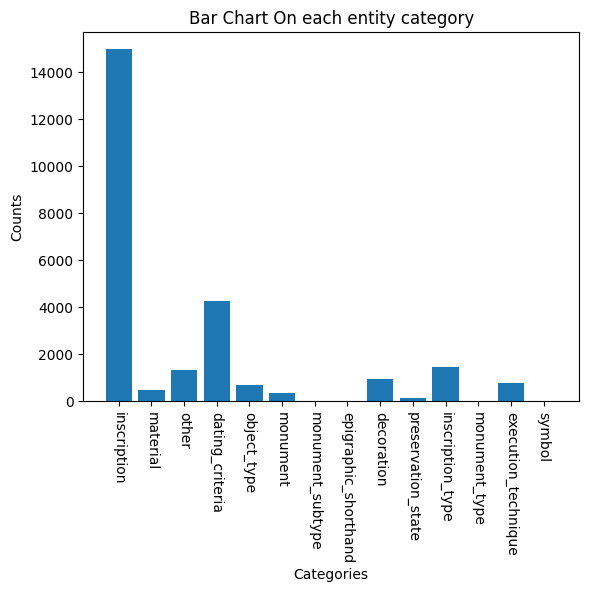

In [63]:
categories = ['number_of_inscription', 'number_of_material', 'number_of_other', 'number_of_dating_criteria', 'number_of_object_type', 'number_of_monument', 'number_of_monument_subtype', 'number_of_epigraphic_shorthand', 'number_of_decoration', 'number_of_preservation_state', 'number_of_inscription_type', 'number_of_monument_type', 'number_of_execution_technique', 'number_of_symbol']
values = [statistics_df[statistics_df['name'] == category]['number'].iloc[0] for category in categories]

categories_list= [category.removeprefix('number_of_') for category in categories]
print(categories_list)
print(values)
plt.bar(categories_list, values)

plt.title('Bar Chart On each entity category')

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=270)
# 显示图表
plt.show()

In [73]:
entity_words = []
#entity_types = []
for each_data in second_data:
    entities = each_data[1]['entities']
    sentence = each_data[0]
    for entity in entities:
        entity_name = entity[2]
        entity_start = entity[0]
        entity_end = entity[1]
        entity_word = sentence[entity_start:entity_end]
        entity_words.append([entity_word, entity_name])
        #entity_types.append(entity_name)

In [74]:
entity_words

[['напис »', 'inscription'],
 ['опис цих', 'inscription'],
 ['графіті —', 'inscription'],
 ['матеріал .', 'material'],
 ['графіті на', 'inscription'],
 ['графіті з', 'inscription'],
 ['графіті Софійського', 'inscription'],
 ['графіті на', 'inscription'],
 ['напис на', 'inscription'],
 ['графіті на', 'inscription'],
 ['епіграфіка і', 'other'],
 ['палеографія :', 'dating_criteria'],
 ['ікона є', 'object_type'],
 ['ікона як', 'object_type'],
 ['ікона постає', 'object_type'],
 ['собор ,', 'monument'],
 ['матеріал ,', 'material'],
 ['графіті –', 'inscription'],
 ['НАРТЕКС »', 'monument_subtype'],
 ['собор ,', 'monument'],
 ['собор ,', 'monument'],
 ['школа экономики', 'monument'],
 ['монограма ,', 'epigraphic_shorthand'],
 ['Церква –', 'monument'],
 ['школа -', 'monument'],
 ['надпис от', 'inscription'],
 ['Церква <', 'monument'],
 ['Церква Київського', 'monument'],
 ['Церква Свято', 'monument'],
 ['Церква була', 'monument'],
 ['Церква визнає', 'monument'],
 ['портал КІРІОС', 'object_type']

In [75]:
annotations = pd.read_csv('data/annotation/annotation.csv', sep = ',')

In [76]:
annotations

,Unnamed: 0,keywords,freq,freq1,freq2,freq3,freq4,usage,type,B_start,inscription,nan
0,0,молитовний напис,126,16,1294.77771,0.00168,1293.610,Молитовний напис. 20 Розділ ІІ. <focus_corpus>,inscription_type,NaN,NaN,NaN
1,1,пам''ятний напис,59,720,606.28479,0.07539,564.710,Пам'ятний напис. 110 Розділ ІV. <focus_corpus>,inscription_type,NaN,NaN,NaN
2,2,чотириконечний хрест,55,46,565.18073,0.00482,563.467,На поверхні личкувального розчину прокреслений...,decoration,NaN,NaN,NaN
3,3,збереженість напису,32,0,328.83243,0.00000,329.832,"Збереженість напису доволі добра, його складов...",preservation_state,NaN,NaN,NaN
4,4,фресковий тиньк,27,86,277.45236,0.00901,275.967,Знаходиться на фресковому тиньку фасадної стін...,material,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,проквітлий,4,46,41.10405,0.00482,41.902,"Найвірогідніше, що це ліва частина перекладини...",other,other,B-inscription,NaN
242,242,орнітоморфний,4,178,41.10405,0.01864,41.334,"Орнітоморфні зображення 546, 547. <focus_corpus>",other,other,B-inscription,NaN
243,243,іхтіоморфний,2,4,20.55203,0.00042,21.543,Фергюсона21 ); 4 ) предмети релігійного вжитку...,other,other,B-inscription,NaN
244,244,перемичкка,1,0,10.27601,0.00000,11.276,Друга чверть XV – початок XVI ст.; за формою н...,other,other,B-inscription,NaN


In [77]:
annotated = []
for keyword in annotations['keywords']:
    annotated.append(keyword)
new_detected = [entity_word for entity_word in entity_words if entity_word[0] not in annotated]
print(new_detected)

[['напис »', 'inscription'], ['опис цих', 'inscription'], ['графіті —', 'inscription'], ['матеріал .', 'material'], ['графіті на', 'inscription'], ['графіті з', 'inscription'], ['графіті Софійського', 'inscription'], ['графіті на', 'inscription'], ['напис на', 'inscription'], ['графіті на', 'inscription'], ['епіграфіка і', 'other'], ['палеографія :', 'dating_criteria'], ['ікона є', 'object_type'], ['ікона як', 'object_type'], ['ікона постає', 'object_type'], ['собор ,', 'monument'], ['матеріал ,', 'material'], ['графіті –', 'inscription'], ['НАРТЕКС »', 'monument_subtype'], ['собор ,', 'monument'], ['собор ,', 'monument'], ['школа экономики', 'monument'], ['монограма ,', 'epigraphic_shorthand'], ['Церква –', 'monument'], ['школа -', 'monument'], ['надпис от', 'inscription'], ['Церква <', 'monument'], ['Церква Київського', 'monument'], ['Церква Свято', 'monument'], ['Церква була', 'monument'], ['Церква визнає', 'monument'], ['портал КІРІОС', 'object_type'], ['іконографія Вознесіння', 'o

In [82]:
new_detected_df = pd.DataFrame(new_detected, columns=['new_entity', 'type'])

In [83]:
new_detected_df.to_csv('data/Test_second/data/new_detected.csv', sep='\t')

In [84]:
print('the number of new detected entities is:', len(new_detected))
print('the number of total detected entities is:', len(entity_words))

the number of new detected entities is: 25203
the number of total detected entities is: 25578


In [85]:
new_detected_df

,new_entity,type
0,напис »,inscription
1,опис цих,inscription
2,графіті —,inscription
3,матеріал .,material
4,графіті на,inscription
...,...,...
25198,напис цілком,inscription
25199,напис не,inscription
25200,плита була,object_type
25201,напис міс12,inscription


In [89]:
new_detected_group_by_type = new_detected_df.groupby('type').count()
new_detected_group_by_type.columns = ['type', 'count']
new_detected_group_by_type

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [ ]:
plt.bar(new_detected_group_by_type['type'], new_detected_group_by_type['new)

plt.title('Bar Chart On each entity category')

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=270)
# 显示图表
plt.show()